<a href="https://colab.research.google.com/github/memari-majid/image-processing/blob/main/ConvNet_implement_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D ConvNet
Naive Convolution Implementation

In [4]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import cv2
import numpy as np

In [6]:
# reading image
image = cv2.imread('/content/drive/MyDrive/Notebooks/Coding/image.jpeg')

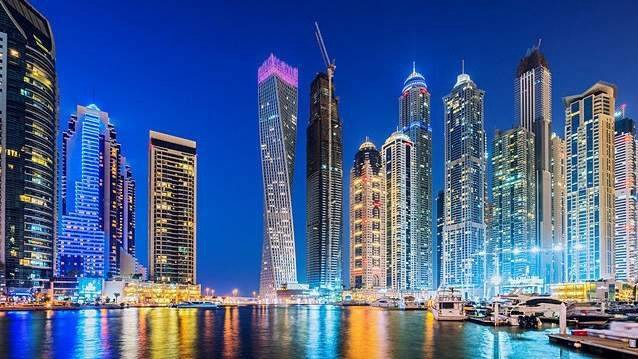

In [7]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

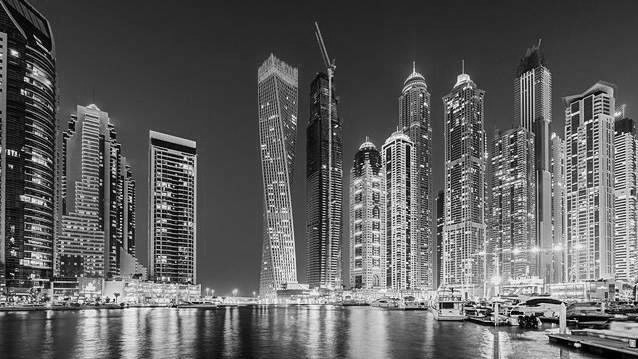

In [8]:
# OpenCV reads images in BGR
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

In [9]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

In [10]:
kernel = np.flipud(np.fliplr(kernel))

In [11]:
xImgShape = image.shape[0]
yImgShape = image.shape[1]

In [12]:
xKernShape = kernel.shape[0]
yKernShape = kernel.shape[1]

In [13]:
padding = 2
strides = 1

In [14]:
xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
output = np.zeros((xOutput, yOutput))

In [15]:
if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    print(imagePadded)
else:
    imagePadded = image

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 78. ... 44.  0.  0.]
 ...
 [ 0.  0. 40. ... 17.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [16]:
for y in range(image.shape[1]):
    if y > image.shape[1] - yKernShape:
        break
    if y % strides == 0:
        for x in range(image.shape[0]):
            if x > image.shape[0] - xKernShape:
                break
            try:
                if x % strides == 0:
                    output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                break

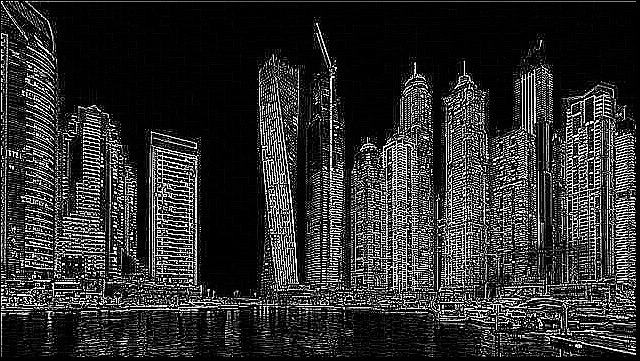

In [17]:
cv2_imshow(output)